In [1]:
library(caret)
library(mlbench)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
path <- "C:\\Users\\01549098\\Documents\\Analise_Preditiva_Avancada\\Decision Tree\\Admission_Predict.csv"
df <- read.csv(file=path, header=TRUE, sep=";")

In [3]:
head(df)

S_ID,GRE,TOFEL,UNIVERSITY_RATING,SOP,LOR,CGPA,RESEARCH,RANK
1,337,118,4,4.5,4.5,9.65,1,A
2,324,107,4,4.0,4.5,8.87,1,B
3,316,104,3,3.0,3.5,8.00,1,B
4,322,110,3,3.5,2.5,8.67,1,B
5,314,103,2,2.0,3.0,8.21,0,B
6,330,115,5,4.5,3.0,9.34,1,A


In [4]:
df$UNIVERSITY_RATING <- as.factor(df$UNIVERSITY_RATING)

In [5]:
df$S_ID <- NULL

In [6]:
head(df)

GRE,TOFEL,UNIVERSITY_RATING,SOP,LOR,CGPA,RESEARCH,RANK
337,118,4,4.5,4.5,9.65,1,A
324,107,4,4.0,4.5,8.87,1,B
316,104,3,3.0,3.5,8.00,1,B
322,110,3,3.5,2.5,8.67,1,B
314,103,2,2.0,3.0,8.21,0,B
330,115,5,4.5,3.0,9.34,1,A


In [7]:
summary(df)

      GRE            TOFEL       UNIVERSITY_RATING      SOP     
 Min.   :290.0   Min.   : 92.0   1: 26             Min.   :1.0  
 1st Qu.:308.0   1st Qu.:103.0   2:107             1st Qu.:2.5  
 Median :317.0   Median :107.0   3:133             Median :3.5  
 Mean   :316.8   Mean   :107.4   4: 74             Mean   :3.4  
 3rd Qu.:325.0   3rd Qu.:112.0   5: 60             3rd Qu.:4.0  
 Max.   :340.0   Max.   :120.0                     Max.   :5.0  
      LOR             CGPA          RESEARCH      RANK   
 Min.   :1.000   Min.   :6.800   Min.   :0.0000   A: 89  
 1st Qu.:3.000   1st Qu.:8.170   1st Qu.:0.0000   B:278  
 Median :3.500   Median :8.610   Median :1.0000   C: 33  
 Mean   :3.453   Mean   :8.599   Mean   :0.5475          
 3rd Qu.:4.000   3rd Qu.:9.062   3rd Qu.:1.0000          
 Max.   :5.000   Max.   :9.920   Max.   :1.0000          

In [8]:
set.seed(18)
trainIndex <- createDataPartition(df$RANK, p = .7, list = FALSE)

In [9]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

Single C5.0 Tree 

282 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 255, 253, 253, 253, 255, 253, ... 
Resampling results:

  Accuracy   Kappa    
  0.8616858  0.6880646


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 22  2  0
         B  4 73  8
         C  0  8  1

Overall Statistics
                                          
               Accuracy : 0.8136          
                 95% CI : (0.7314, 0.8793)
    No Information Rate : 0.7034          
    P-Value [Acc > NIR] : 0.004491        
                                          
                  Kappa : 0.5788          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8462   0.8795 0.111111
Specificity            0.9783   0.6571 0.926606
Pos Pred Value         0.9167   0.8588 0.111111
Neg Pred Value         0.9574   0.6970 0.926606
Prevalence             0.2203   0.7034 0.076271
Detection Rate         0.1864   0.6186 0.008475
Detection Prevalence   0.2034   0.7203 0.076271
Balanced Accuracy      0.9122   0.7683 0.518858

,A,B,C
4,0.01670158,0.92586264,0.057435787
6,0.97842790,0.01920804,0.002364066
7,0.01670158,0.92586264,0.057435787
8,0.01670158,0.92586264,0.057435787
14,0.01670158,0.92586264,0.057435787
16,0.01670158,0.92586264,0.057435787


C5.0Tree variable importance

                   Overall
CGPA                100.00
GRE                  87.59
UNIVERSITY_RATING5   26.24
RESEARCH              8.16
UNIVERSITY_RATING3    7.09
LOR                   4.26
UNIVERSITY_RATING2    0.00
TOFEL                 0.00
UNIVERSITY_RATING4    0.00
SOP                   0.00

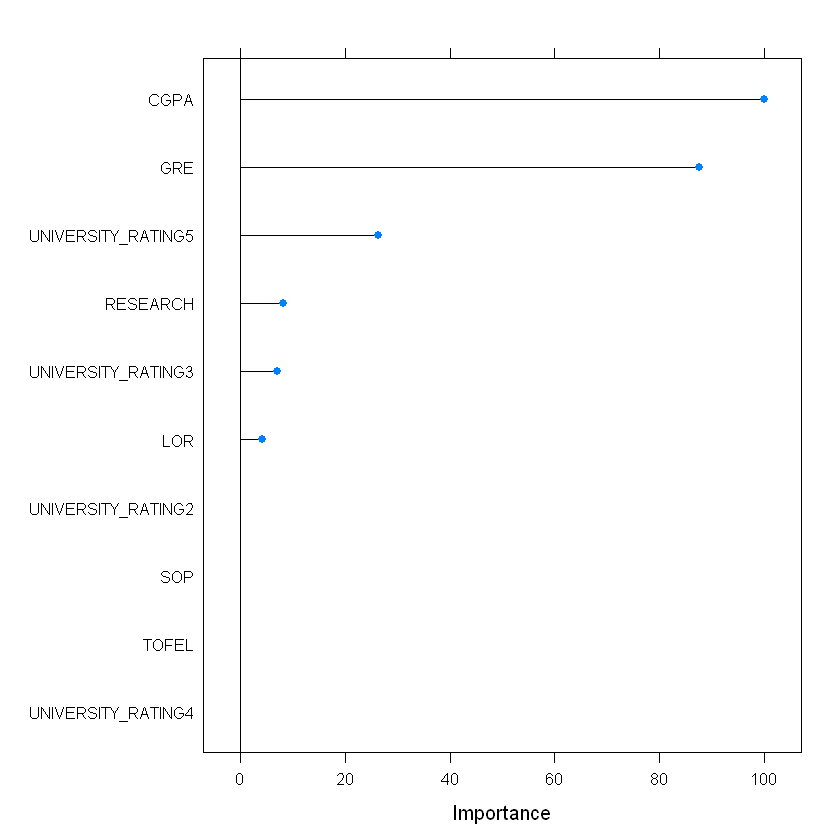

In [10]:
set.seed(10)

# Definindo Parâmetros do Cross Validation
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE, classProbs=TRUE)

# Treinando Modelo de Árvore Simples
model_5.0 <- train(RANK~. , data = dfTrain, method = "C5.0Tree", trControl = cv)

model_5.0

# Montando a Matriz de Confusão
pred_5.0 <- predict(model_5.0 ,newdata=dfTest)
confusionMatrix(data=pred_5.0, dfTest$RANK)

# Fazendo Scoring do Modelo
classProbs_5.0 <- predict(model_5.0, newdata=dfTest, type="prob")
head(classProbs_5.0)

# Verificando Importância das Variáveis Preditoras
imp <- varImp(model_5.0, scale=FALSE)
imp
plot(imp)

eXtreme Gradient Boosting 

282 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 255, 253, 254, 254, 254, 254, ... 
Resampling results across tuning parameters:

  eta  max_depth  colsample_bytree  subsample  nrounds  Accuracy   Kappa    
  0.3  1          0.6               0.50        50      0.8756933  0.7255238
  0.3  1          0.6               0.50       100      0.8721310  0.7159033
  0.3  1          0.6               0.50       150      0.8654899  0.7001020
  0.3  1          0.6               0.75        50      0.8759487  0.7262851
  0.3  1          0.6               0.75       100      0.8795202  0.7326448
  0.3  1          0.6               0.75       150      0.8654808  0.7064379
  0.3  1          0.6               1.00        50      0.9008347  0.7751108
  0.3  1          0.6               1.00       100      0.8902436  0.7539120
  0.3  1          0.6               1.00   

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 25  3  0
         B  1 74  5
         C  0  6  4

Overall Statistics
                                         
               Accuracy : 0.8729         
                 95% CI : (0.799, 0.9271)
    No Information Rate : 0.7034         
    P-Value [Acc > NIR] : 1.192e-05      
                                         
                  Kappa : 0.7263         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9615   0.8916  0.44444
Specificity            0.9674   0.8286  0.94495
Pos Pred Value         0.8929   0.9250  0.40000
Neg Pred Value         0.9889   0.7632  0.95370
Prevalence             0.2203   0.7034  0.07627
Detection Rate         0.2119   0.6271  0.03390
Detection Prevalence   0.2373   0.6780  0.08475
Balanced Accuracy      0.9645   0.8601  0.69470

A,B,C
7.233102e-03,0.985317767,0.0074491813
9.993536e-01,0.000472045,0.0001744235
3.922940e-03,0.994002402,0.0020746414
1.173748e-04,0.070231386,0.9296512604
1.286308e-03,0.990803242,0.0079104798
7.198529e-05,0.950949371,0.0489786118


C5.0Tree variable importance

                   Overall
CGPA                100.00
GRE                  87.59
UNIVERSITY_RATING5   26.24
RESEARCH              8.16
UNIVERSITY_RATING3    7.09
LOR                   4.26
SOP                   0.00
UNIVERSITY_RATING4    0.00
UNIVERSITY_RATING2    0.00
TOFEL                 0.00

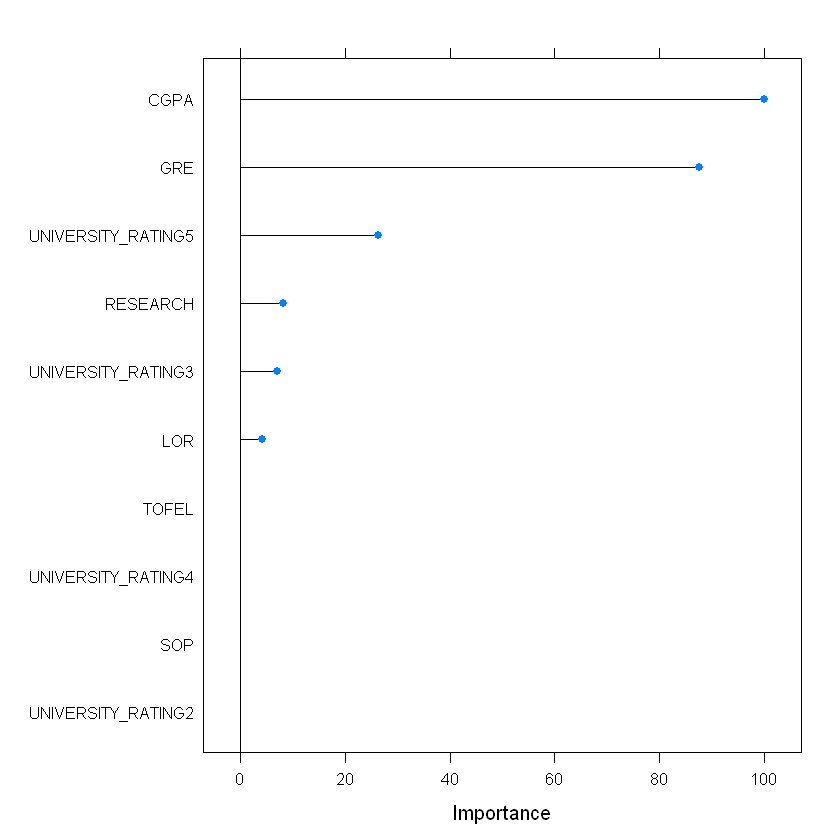

In [11]:
set.seed(143)

# Definindo Parâmetros do Cross Validation
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE, classProbs=TRUE)

# Treinando Modelo com Boosting (XgBoost)
model_boosting <- train(RANK~. , data = dfTrain, method = "xgbTree",trControl = cv)

model_boosting

# Gerando Matriz de Confusão
pred_boosting <- predict(model_boosting ,newdata=dfTest)
confusionMatrix(data=pred_boosting, dfTest$RANK)

# Fazendo Scoring do Modelo
classProbs_boosting <- predict(model_boosting, newdata=dfTest, type="prob")
head(classProbs_boosting)

# Importância das Variáveis Preditoras
imp <- varImp(model_5.0, scale=FALSE)
imp
plot(imp)

Bagged CART 

282 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 252, 254, 255, 253, 255, 253, ... 
Resampling results:

  Accuracy   Kappa    
  0.8713474  0.7116596


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 24  3  0
         B  2 74  8
         C  0  6  1

Overall Statistics
                                        
               Accuracy : 0.839         
                 95% CI : (0.76, 0.9002)
    No Information Rate : 0.7034        
    P-Value [Acc > NIR] : 0.0005063     
                                        
                  Kappa : 0.6376        
                                        
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9231   0.8916 0.111111
Specificity            0.9674   0.7143 0.944954
Pos Pred Value         0.8889   0.8810 0.142857
Neg Pred Value         0.9780   0.7353 0.927928
Prevalence             0.2203   0.7034 0.076271
Detection Rate         0.2034   0.6271 0.008475
Detection Prevalence   0.2288   0.7119 0.059322
Balanced Accuracy      0.9452   0.8029 0.528033

A,B,C
0.00,1.00,0.00
0.96,0.04,0.00
0.00,0.96,0.04
0.00,0.44,0.56
0.00,0.92,0.08
0.00,0.96,0.04


C5.0Tree variable importance

                   Overall
CGPA                100.00
GRE                  87.59
UNIVERSITY_RATING5   26.24
RESEARCH              8.16
UNIVERSITY_RATING3    7.09
LOR                   4.26
UNIVERSITY_RATING4    0.00
SOP                   0.00
UNIVERSITY_RATING2    0.00
TOFEL                 0.00

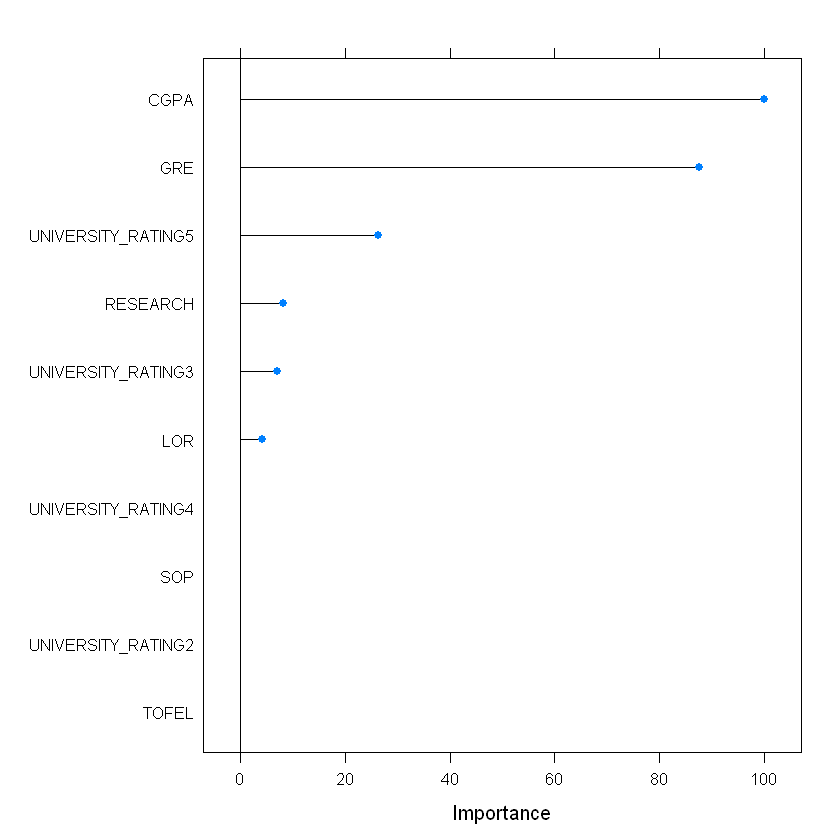

In [12]:
set.seed(186)

# Definindo Parâmetros do Cross Validation
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE, classProbs=TRUE)

# Treindo Modelo com Bagging
model_bagging <- train(RANK~. , data = dfTrain, method = "treebag",trControl = cv)

model_bagging

# Gerando Matriz de Confusão
pred_bagging <- predict(model_bagging ,newdata=dfTest)
confusionMatrix(data=pred_bagging, dfTest$RANK)

# Fazendo Scoring do Modelo
classProbs_bagging <- predict(model_bagging, newdata=dfTest, type="prob")
head(classProbs_bagging)

# Importância das Variáveis Preditoras
imp <- varImp(model_5.0, scale=FALSE)
imp
plot(imp)

Random Forest 

282 samples
  7 predictor
  3 classes: 'A', 'B', 'C' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 253, 254, 254, 255, 254, 254, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9090285  0.7930574
   6    0.8911622  0.7545299
  10    0.8842574  0.7441145

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 25  2  0
         B  1 79  8
         C  0  2  1

Overall Statistics
                                       
               Accuracy : 0.8898       
                 95% CI : (0.819, 0.94)
    No Information Rate : 0.7034       
    P-Value [Acc > NIR] : 1.202e-06    
                                       
                  Kappa : 0.7396       
                                       
 Mcnemar's Test P-Value : NA           

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9615   0.9518 0.111111
Specificity            0.9783   0.7429 0.981651
Pos Pred Value         0.9259   0.8977 0.333333
Neg Pred Value         0.9890   0.8667 0.930435
Prevalence             0.2203   0.7034 0.076271
Detection Rate         0.2119   0.6695 0.008475
Detection Prevalence   0.2288   0.7458 0.025424
Balanced Accuracy      0.9699   0.8473 0.546381

,A,B,C
4,0.008,0.980,0.012
6,0.964,0.036,0.000
7,0.002,0.996,0.002
8,0.000,0.672,0.328
14,0.012,0.882,0.106
16,0.000,0.986,0.014


C5.0Tree variable importance

                   Overall
CGPA                100.00
GRE                  87.59
UNIVERSITY_RATING5   26.24
RESEARCH              8.16
UNIVERSITY_RATING3    7.09
LOR                   4.26
SOP                   0.00
UNIVERSITY_RATING4    0.00
UNIVERSITY_RATING2    0.00
TOFEL                 0.00

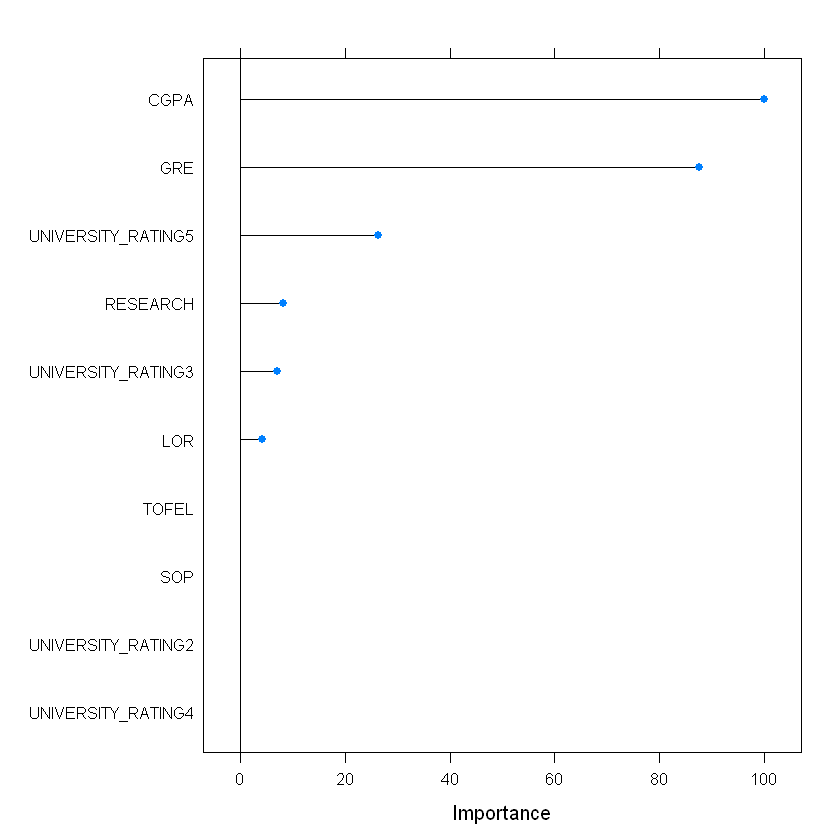

In [13]:
set.seed(191)

# Definindo Parâmetros do Cross Validation
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE, classProbs=TRUE)

# Treinando Modelo Random Forest
model_rf <- train(RANK~. , data = dfTrain, method = "rf",trControl = cv)

model_rf

# Gerando Matriz de Confusão
pred_rf <- predict(model_rf ,newdata=dfTest)
confusionMatrix(data=pred_rf, dfTest$RANK)

# Fazendo Scoring do Modelo
classProbs_rf <- predict(model_rf, newdata=dfTest, type="prob")
head(classProbs_rf)

# Importância das Variáveis Preditoras
imp <- varImp(model_5.0, scale=FALSE)
imp
plot(imp)